## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Generate random dataset such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [4]:
x_data = np.random.uniform(0,20,100)

In [5]:
a = -2
b = 1
y_labels= a*x_data + b

## Batch GD

In [19]:
def Batch_GD_LinearRegrission(data, labels, alpha = 0.001, iteration = 50):
    theta_0 = 0
    theta_1 = 0
    
    list_theta0 = []
    list_theta1 = []
    list_cost   = []
    list_yhat   = []

    for i in range(iteration):

        h = theta_0 + theta_1 * data
        error = h - labels
        cost = np.sum(error**2) / (2 * len(data))

        gradient_theta0 = np.sum(error) / len(data)
        gradient_theta1 = np.sum(error*data) / len(data)

        theta_0 = theta_0 - alpha*gradient_theta0
        theta_1 = theta_1 - alpha*gradient_theta1

        list_theta0.append(theta_0)
        list_theta1.append(theta_1)
        list_cost.append(cost)
        list_yhat.append(h)
    
    y_hat = theta_0 + theta_1 * data
    
    return list_theta0, list_theta1, list_cost, list_yhat, theta_0, theta_1, y_hat
    

#### Try your function with any input parameterss of your choice.

In [21]:
alpha = 0.001
epochs = 50

list_theta0, list_theta1, list_cost, list_yhat, theta_0, theta_1, y_predicted = Batch_GD_LinearRegrission(x_data, y_labels, alpha = alpha, iteration = epochs)

#### Calculate r2 score

In [22]:
from sklearn.metrics import r2_score

R_square = r2_score(y_labels, y_predicted)
print(R_square)

0.9979793153540604


#### Plot loss vs. epochs

Text(0, 0.5, 'Loss')

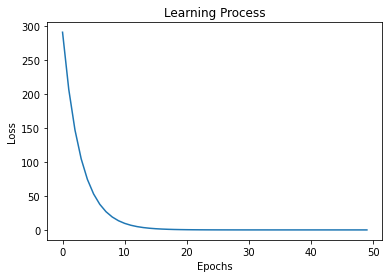

In [23]:
plt.plot(range(epochs), list_cost)
plt.title("Learning Process")
plt.xlabel("Epochs")
plt.ylabel("Loss")

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'Loss')

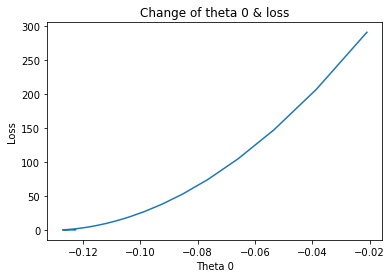

In [24]:
plt.plot(list_theta0, list_cost)
plt.title("Change of theta 0 & loss")
plt.xlabel("Theta 0")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

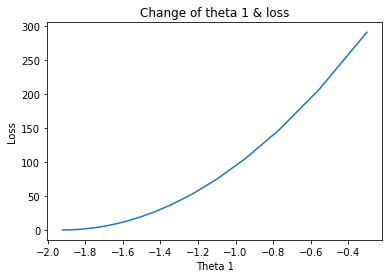

In [25]:
plt.plot(list_theta1, list_cost)
plt.title("Change of theta 1 & loss")
plt.xlabel("Theta 1")
plt.ylabel("Loss")

#### Plot all regression lines till converge

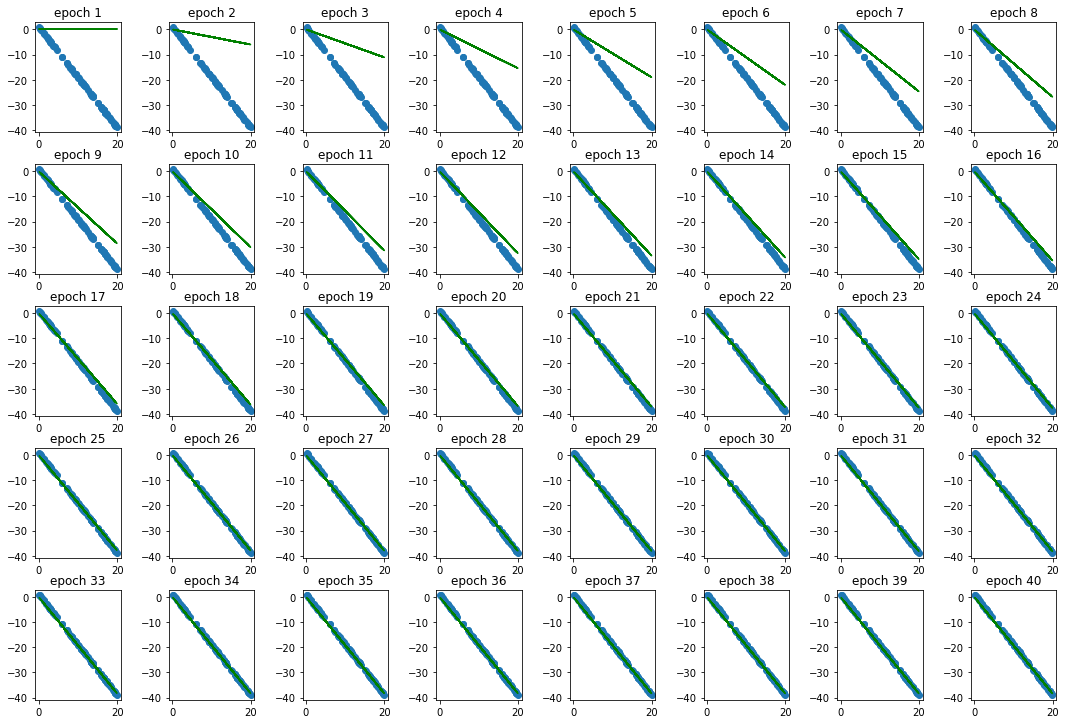

In [26]:
# plot only the first 40 epoch 
n = 0
fig, axis = plt.subplots(5,8, figsize=(15,10))
fig.tight_layout()

for i in range(5):
    for j in range(8):
        axis[i, j].scatter(x_data, y_labels)
        axis[i, j].plot(x_data, list_yhat[n], color='g')
        axis[i, j].set_title("epoch {}".format(n+1))
        n = n+1
    

#### Plot the best regression line

Text(0.5, 1.0, 'Best Fitted Line')

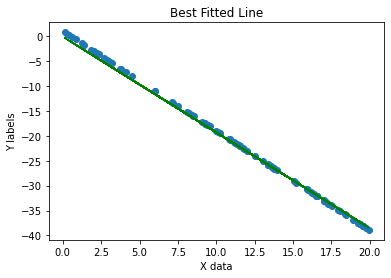

In [27]:
plt.scatter(x_data, y_labels)
plt.plot(x_data, y_predicted, color='g')
plt.xlabel('X data')
plt.ylabel('Y labels')
plt.title('Best Fitted Line')

## -------------------------------------------------------------------------------------------------------------

## Mini Batch GD:

In [28]:
def MiniBatch_GD_LinearRegrission(data, labels, alpha = 0.001, iteration = 50, batch_size = 4):
    theta_0 = 0
    theta_1 = 0
    
    list_theta0 = []
    list_theta1 = []
    list_cost   = []
    list_yhat   = []
    
    len_data = len(labels)
    data_per_batch = len_data // batch_size

    for i in range(iteration):
        for j in range (batch_size):
            batch_data = data[j*data_per_batch : data_per_batch*(j+1)]
            batch_labels = labels[j*data_per_batch : data_per_batch*(j+1)]

            h = theta_0 + theta_1 * batch_data
            error = h - batch_labels
            cost = np.sum(error**2) / (2 * len(batch_data))

            gradient_theta0 = np.sum(error) / len(batch_data)
            gradient_theta1 = np.sum(error*batch_data) / len(batch_data)

            theta_0 = theta_0 - alpha*gradient_theta0
            theta_1 = theta_1 - alpha*gradient_theta1

        y_hat = theta_0 + theta_1 * data
        list_theta0.append(theta_0)
        list_theta1.append(theta_1)
        list_cost.append(cost)
        list_yhat.append(y_hat)
    
    
    
    return list_theta0, list_theta1, list_cost, list_yhat, theta_0, theta_1, y_hat
    

### Generate data 

In [29]:
x_data = np.random.uniform(0,20,100)

a = -2
b = 1
y_labels= a*x_data + b

#### Try with shuffle the data

In [30]:
from sklearn.utils import shuffle 

x_data, y_labels = shuffle(x_data, y_labels)

In [31]:
alpha = 0.0001
epochs = 40
batch_size = 16


In [32]:
list_theta0, list_theta1, list_cost, list_yhat, theta_0, theta_1, y_predicted = MiniBatch_GD_LinearRegrission(x_data, y_labels, alpha = alpha, iteration = epochs, batch_size = batch_size)

In [33]:
from sklearn.metrics import r2_score

R_square = r2_score(y_labels, y_predicted)
print(R_square)

0.9976938355913937


Text(0, 0.5, 'Loss')

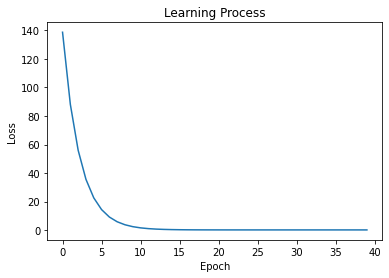

In [34]:
plt.plot(range(epochs), list_cost)
plt.title("Learning Process")
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

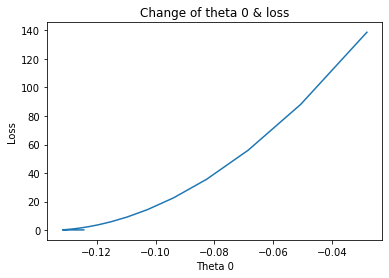

In [35]:
plt.plot(list_theta0, list_cost)
plt.title("Change of theta 0 & loss")
plt.xlabel("Theta 0")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

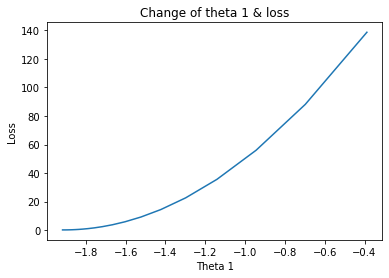

In [36]:
plt.plot(list_theta1, list_cost)
plt.title("Change of theta 1 & loss")
plt.xlabel("Theta 1")
plt.ylabel("Loss")

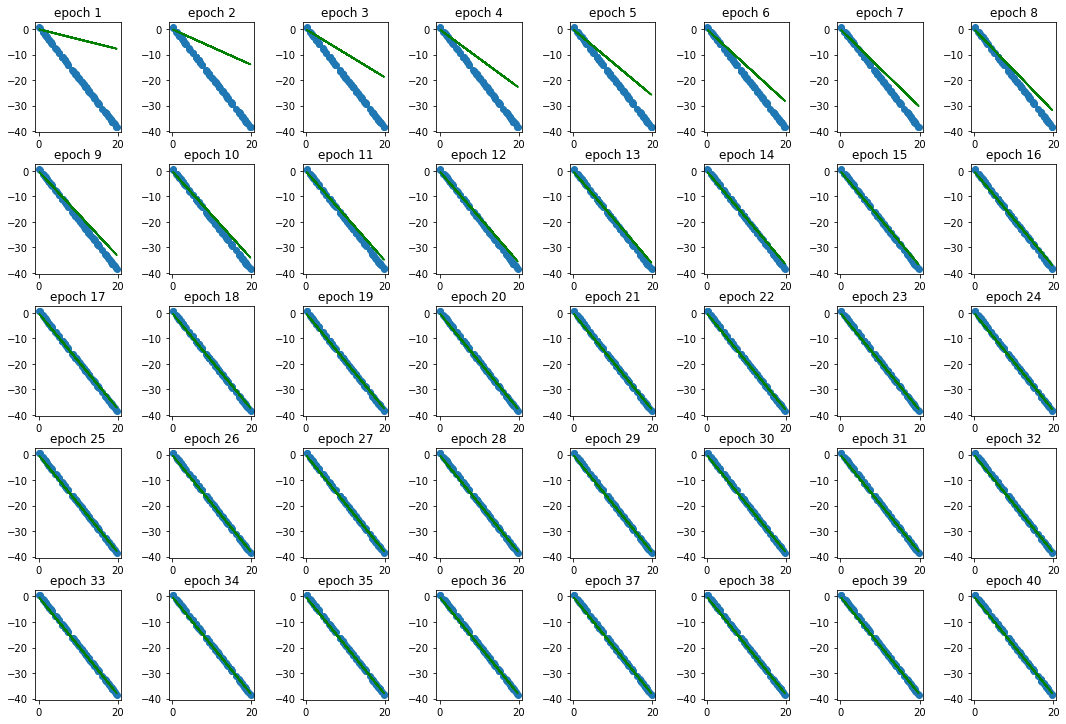

In [37]:
# plot only the first 40 epoch 
n = 0
fig, axis = plt.subplots(5,8, figsize=(15,10))
fig.tight_layout()

for i in range(5):
    for j in range(8):
        axis[i, j].scatter(x_data, y_labels)
        axis[i, j].plot(x_data, list_yhat[n], color='g')
        axis[i, j].set_title("epoch {}".format(n+1))
        n = n+1
    

Text(0.5, 1.0, 'Best Fitted Line')

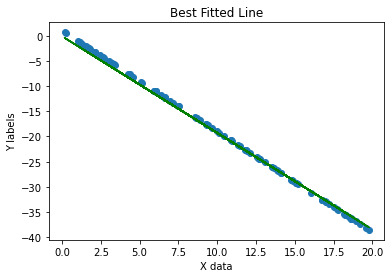

In [38]:
plt.scatter(x_data, y_labels)
plt.plot(x_data, y_predicted, color='g')
plt.xlabel('X data')
plt.ylabel('Y labels')
plt.title('Best Fitted Line')

## -------------------------------------------------------------------------------------------------------------

## Stochastic GD

In [10]:
def Stoch_GD_LinearRegrission(data, labels, alpha = 0.001, iteration = 50):
    theta_0 = 0
    theta_1 = 0
    
    list_theta0 = []
    list_theta1 = []
    list_cost   = []
    list_yhat   = []
    
    len_data = len(labels)

    for i in range(iteration):
        for j in range (len_data):
            h = theta_0 + theta_1 * data[j]
            error = h - labels[j]
            cost = error**2 / 2 

            gradient_theta0 = error
            gradient_theta1 = error*data[j]

            theta_0 = theta_0 - alpha*gradient_theta0
            theta_1 = theta_1 - alpha*gradient_theta1

        y_hat = theta_0 + theta_1 * data
        list_theta0.append(theta_0)
        list_theta1.append(theta_1)
        list_cost.append(cost)
        list_yhat.append(y_hat)
    
    
    
    return list_theta0, list_theta1, list_cost, list_yhat, theta_0, theta_1, y_hat
    

In [11]:
### Generate data 

x_data = np.random.uniform(0,20,100)

a = -2
b = 1
y_labels= a*x_data + b

#### Try with shuffle the data

from sklearn.utils import shuffle 

x_data, y_labels = shuffle(x_data, y_labels)

alpha = 0.01
epochs = 50


In [12]:
list_theta0, list_theta1, list_cost, list_yhat, theta_0, theta_1, y_predicted = Stoch_GD_LinearRegrission(x_data, y_labels, alpha = alpha, iteration = epochs)

In [13]:
R_square = r2_score(y_labels, y_predicted)
print(R_square)

0.9999999999999012


Text(0, 0.5, 'Loss')

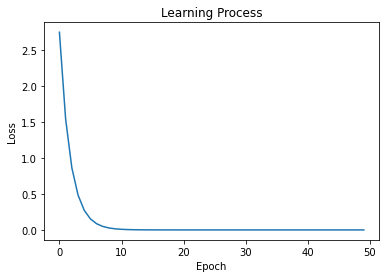

In [14]:
plt.plot(range(epochs), list_cost)
plt.title("Learning Process")
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

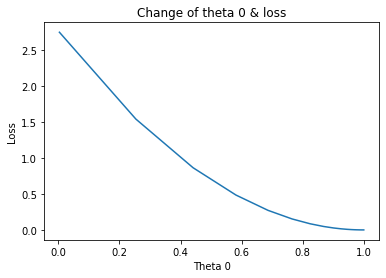

In [15]:
plt.plot(list_theta0, list_cost)
plt.title("Change of theta 0 & loss")
plt.xlabel("Theta 0")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

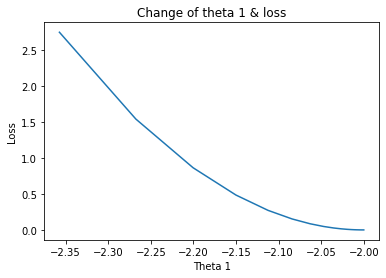

In [16]:
plt.plot(list_theta1, list_cost)
plt.title("Change of theta 1 & loss")
plt.xlabel("Theta 1")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Best Fitted Line')

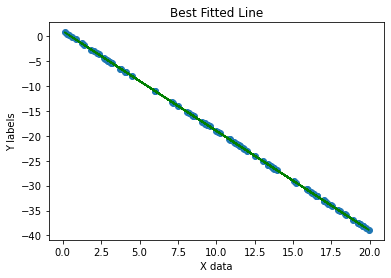

In [17]:
plt.scatter(x_data, y_labels)
plt.plot(x_data, y_predicted, color='g')
plt.xlabel('X data')
plt.ylabel('Y labels')
plt.title('Best Fitted Line')

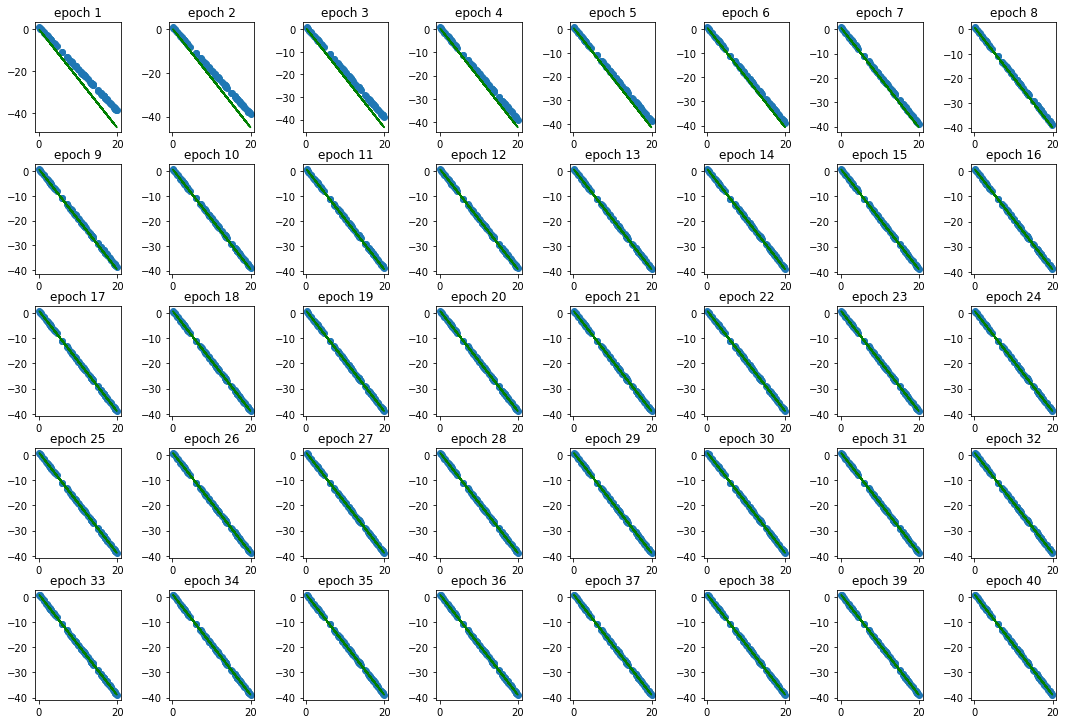

In [18]:
# plot only the first 40 epoch 
n = 0
fig, axis = plt.subplots(5,8, figsize=(15,10))
fig.tight_layout()

for i in range(5):
    for j in range(8):
        axis[i, j].scatter(x_data, y_labels)
        axis[i, j].plot(x_data, list_yhat[n], color='g')
        axis[i, j].set_title("epoch {}".format(n+1))
        n = n+1